# 01. Importing Libraries

In [1]:
#import libraries

import pandas as pd
import numpy as np
import os
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 02. Importing Data

In [2]:
#importing data (orders)
df = pd.read_csv(r'C:\Users\User\OneDrive\Dokumentumok\CF\Achievement 6\Boat_Sales\boat_data.csv')

In [3]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


# 03. Missing Values

In [4]:
#finding missing values
df.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

In [5]:
#drop rows with missing values
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7019 entries, 1 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        7019 non-null   object 
 1   Boat Type                    7019 non-null   object 
 2   Manufacturer                 7019 non-null   object 
 3   Type                         7019 non-null   object 
 4   Year Built                   7019 non-null   int64  
 5   Length                       7019 non-null   float64
 6   Width                        7019 non-null   float64
 7   Material                     7019 non-null   object 
 8   Location                     7019 non-null   object 
 9   Number of views last 7 days  7019 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 603.2+ KB


# 04. Duplicates

In [7]:
df.shape

(7019, 10)

In [8]:
#finding duplicates
df = df.drop_duplicates()

In [9]:
df.shape

(7019, 10)

In [10]:
#there are no duplicates in the dataframe

# 05. Outliers

In [11]:
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days'],
      dtype='object')

In [12]:
#select the numeric columns without 'Number of views last 7 days',
#because the very popular boats can generate extrem high views but this is normal
df_numeric = df[['Year Built', 'Length', 'Width']]

In [13]:
#finding outliers

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

df_outliers = df_numeric[outliers]

In [14]:
df_outliers

,Year Built,Length,Width
2,0,3.69,1.42
5,0,4.03,1.56
11,0,4.13,1.41
15,0,3.88,1.49
16,0,4.31,1.64
...,...,...,...
9844,0,3.99,1.52
9870,0,4.40,1.51
9876,0,6.50,2.45
9880,0,4.01,1.64


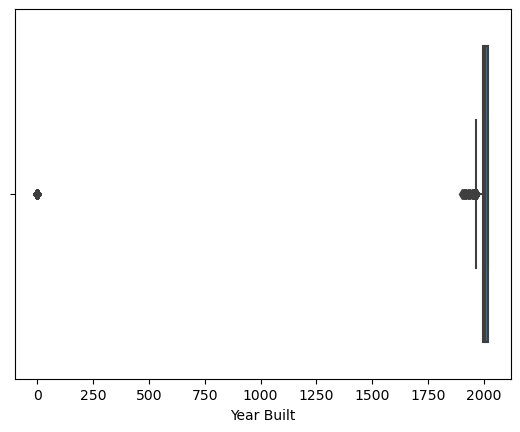

In [15]:
# make figures to see better the distribution and the outliers
sns.boxplot(x=df['Year Built'])
plt.show()
# 0 is actually not an outlier but a missing value

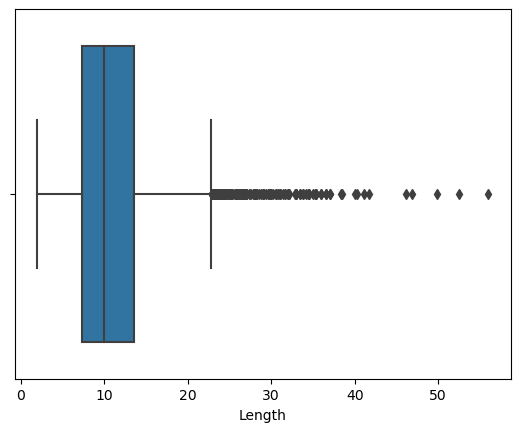

In [16]:
# make figures to see better the distribution and the outliers
sns.boxplot(x=df['Length'])
plt.show()
# no irreal outliers found

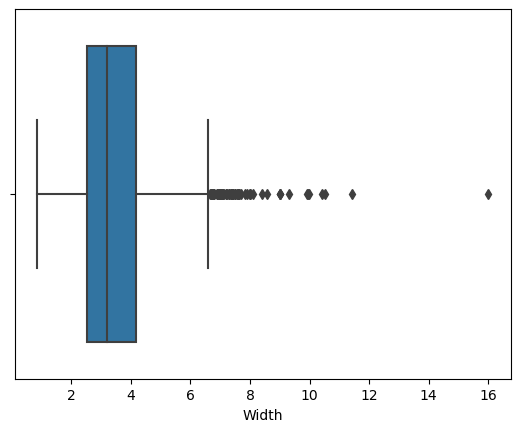

In [17]:
# make figures to see better the distribution and the outliers
sns.boxplot(x=df['Width'])
plt.show()
# no irreal outliers found

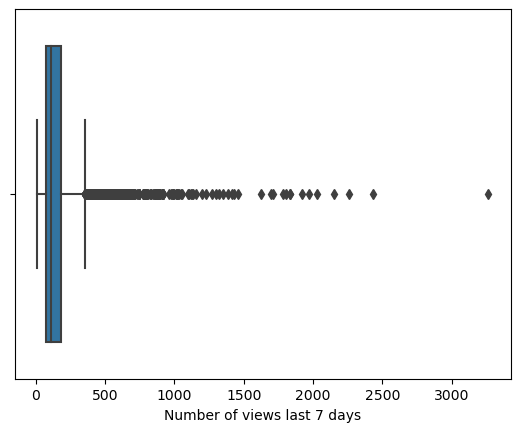

In [18]:
# make figures to see better the distribution and the outliers
sns.boxplot(x=df['Number of views last 7 days'])
plt.show()

In [19]:
df['Number of views last 7 days'].max()
# no irreal outliers found

3263

In [20]:
# impute the missing 'Year Built' values with the median
df['Year Built'].median()

2008.0

In [21]:
df['Year Built']

1       2020
2          0
4       2019
5          0
10      1987
        ... 
9880       0
9881       0
9882    1984
9885    2020
9887    2019
Name: Year Built, Length: 7019, dtype: int64

In [22]:
# impute the missing 'Year Built' values with the median
df['Year Built'].replace(0, 2008, inplace=True)

#df['col1'].replace(['apple', 'banana'], 'fruit', inplace=True)

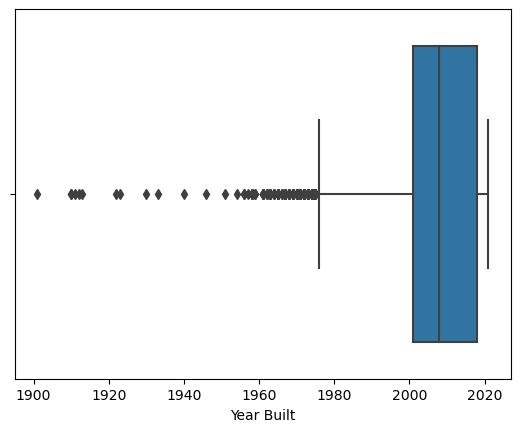

In [23]:
# make figures to see better the distribution and the outliers
sns.boxplot(x=df['Year Built'])
plt.show()
# 0 is actually not an outlier but a missing value

In [24]:
df['Year Built']

1       2020
2       2008
4       2019
5       2008
10      1987
        ... 
9880    2008
9881    2008
9882    1984
9885    2020
9887    2019
Name: Year Built, Length: 7019, dtype: int64

# 06. Descriptive Analyzis

In [25]:
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length',
       'Width', 'Material', 'Location', 'Number of views last 7 days'],
      dtype='object')

In [26]:
#descriptive analysis
df.describe()

,Year Built,Length,Width,Number of views last 7 days
count,7019.000000,7019.000000,7019.000000,7019.000000
mean,2006.867218,11.036492,3.433109,159.909104
std,12.262252,5.144034,1.119766,167.153110
min,1901.000000,1.980000,0.860000,13.000000
25%,2001.000000,7.280000,2.540000,72.000000
50%,2008.000000,9.950000,3.200000,112.000000
75%,2018.000000,13.500000,4.180000,185.000000
max,2021.000000,56.000000,16.000000,3263.000000


In [27]:
# modus
df['Year Built'].mode()

0    2020
Name: Year Built, dtype: int64

In [28]:
# modus
df['Length'].mode()

0    9.0
Name: Length, dtype: float64

In [29]:
# modus
df['Width'].mode()

0    2.5
Name: Width, dtype: float64

In [30]:
# modus
df['Number of views last 7 days'].mode()

0    74
Name: Number of views last 7 days, dtype: int64

Text(0.5, 0, 'Year Built')

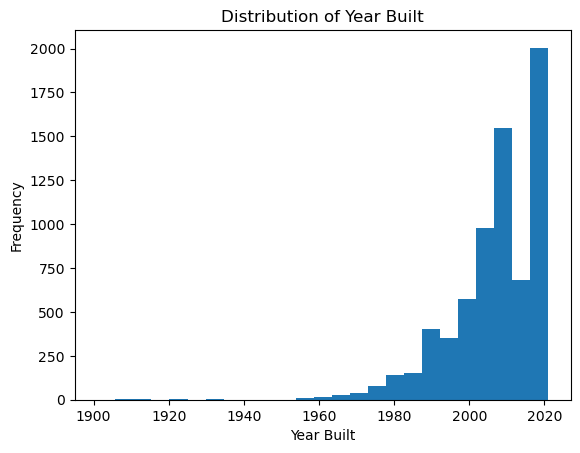

In [35]:
#creating histogram
df['Year Built'].plot.hist(bins = 25)
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')


Text(0.5, 0, 'Length')

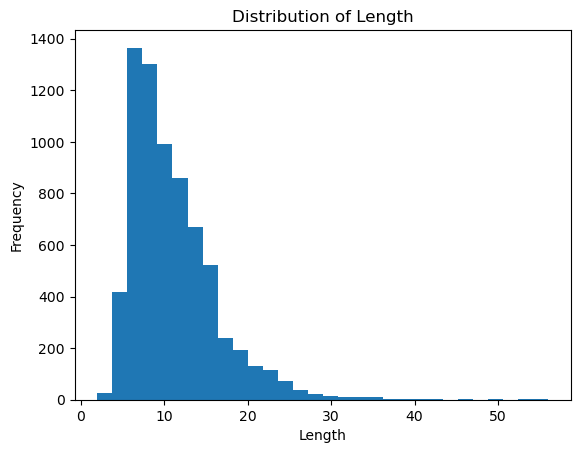

In [37]:
#creating histogram
df['Length'].plot.hist(bins = 30)
plt.title('Distribution of Length')
plt.xlabel('Length')

Text(0.5, 0, 'Width')

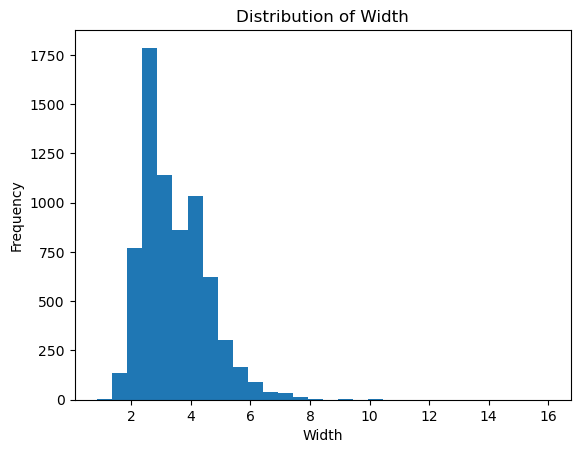

In [39]:
#creating histogram
df['Width'].plot.hist(bins = 30)
plt.title('Distribution of Width')
plt.xlabel('Width')

Text(0.5, 0, 'Number of views last 7 days')

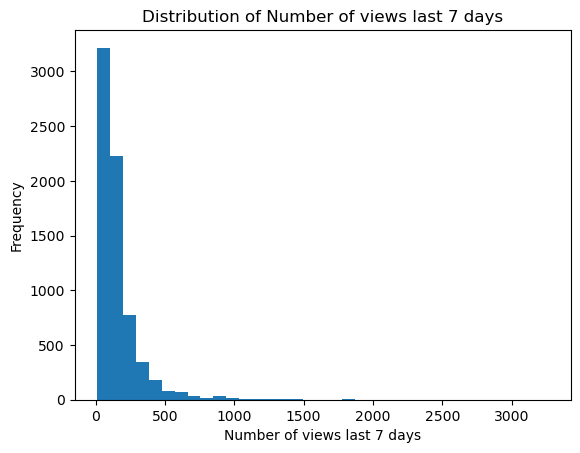

In [42]:
#creating histogram
df['Number of views last 7 days'].plot.hist(bins = 35)
plt.title('Distribution of Number of views last 7 days')
plt.xlabel('Number of views last 7 days')

# 07. Exporting csv

In [43]:
# export the dataframe to csv file
df.to_csv(r'C:\Users\User\OneDrive\Dokumentumok\CF\Achievement 6\Boat_Sales\02 Data\Prepared Data\boat_data_clean.cs')